## Project Scoping

This is a portfolio project from the Data Scientist: Analytics Specialist career path in Codecademy.
The data in this project comes from two csv files: observations and species_info, regarding species observed in four national parks and their status on the Endangered Species List.

In this project, I will be examining the data in both files and drawing conclusions to answer some initial questions. 

## Questions to Answer

- Which park is home to the most endangered species?
- Which park has the most biodiversity, in plants and animals? 
- Is there a relationship between endangered species and observation level at the parks?
- Which genus (type of species) seems to be most in need of protection?

## Loading the Data

First, I will load the data from the csv files into pandas dataframes. To do so, I'll need to import pandas. I'll also import some other common libraries for data analysis, since I'll probably be using them later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Create dataframes
observations_df = pd.read_csv('observations.csv', encoding='utf-8')
species_info_df = pd.read_csv('species_info.csv', encoding='utf-8')

Now I want to examine the data in each dataframe

In [5]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The observations_df has three columns: the scientific name of the animal, the park where it was observed, and the number of observations.
There are 23296 rows in the dataframe, and there appear to be no null values. However, there could be hidden null values such as "Not Recorded" or "0", and I want to check for those.

In [8]:
#Get list of park names
print(observations_df.park_name.value_counts())

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


In [14]:
#Confirm there are no hidden null values, such as "None" or "N/A" in scientific name
print(observations_df.loc[observations_df.scientific_name.str.contains('[Nn]one|N/A|[Nn]ot ', regex = True)])

Empty DataFrame
Columns: [scientific_name, park_name, observations]
Index: []


In [10]:
#Check observations column for zero values
print(observations_df.observations.min())

9


From this, I'm satisfied that there are no hidden null values in the observations_df. The list of park names is short enough to review manually. The list of species is too long to review manually, but does not contain either "None", "N/A", or "Not " (which would precede "Not Recorded" or "Not Identified". The minimum value for observations is 9, so there were no cases of 0 observations. Since the observations column has an int datatype, I know there are no hidden null text values to check for.

Now I want to do the same thing for the species_info_df:

In [11]:
species_info_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [12]:
species_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


The species_info_df has fewer rows than the observations_df, but still too many to review manually. The conservation_status column has almost no non-null values. I know from reviewing the example project that null values in this column mean the animal is not on the Endangered Species list, so after checking the other columns for hidden null values I will update the null values in conservation_status to read "Not Threatened"

In [13]:
#Get list of values for species info
print(species_info_df.category.value_counts())

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


In [11]:
#Confirm there are no hidden null values, such as "None" or "N/A" in scientific name
print(species_info_df.loc[species_info_df.scientific_name.str.contains('[Nn]one|N/A|[Nn]ot ', regex = True)])

Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


In [12]:
#Confirm there are no hidden null values, such as "None" or "N/A" in common names
print(species_info_df.loc[species_info_df.common_names.str.contains('[Nn]one|N/A|[Nn]ot ', regex = True)])

            category            scientific_name  \
3855  Vascular Plant          Medicago lupulina   
4876  Vascular Plant  Plagiobothrys myosotoides   

                                           common_names conservation_status  
3855  Black Medic, Black Medic Clover, Black Medick,...                 NaN  
4876                        Forget-Me-Not Popcornflower                 NaN  


In [13]:
#Get list of values for conservation status
print(species_info_df.conservation_status.value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [51]:
#Fill null values in conservation status with "Not Threatened"
species_info_df= species_info_df.fillna(value = {'conservation_status': "Not Threatened"})
print(species_info_df.conservation_status.value_counts())

Not Threatened        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


It looks like besides the null values in conservation_status, the species_info_df also contains no other hidden missing data. My regex caught a few values, but these were part of common names and not true missing data.

I didn't do this for the observations data, but for this dataframe I want to make sure there are no duplicate values for scientific name or common name. I'll likely be combining the dataframes later on, and if there are duplicate values for scientific name where we join them, it could create duplicate observational values.

In [15]:
#Check number of unique values in each column compared to dataframe
print(species_info_df.scientific_name.nunique())
print(species_info_df.common_names.nunique())
print(len(species_info_df))

5541
5504
5824


It looks like there are some duplicate values for both scientific name and common name. I won't do anything to this base dataframe, but it is something I will take into consideration when combining the dataframes.

Now that I've examined the data sources individually, I can start analyzing the data to answer my first question.

## Which park is home to the most endangered species?

To answer this question, I'll need to combine the two dataframes on the scientific_name columns. Because of the duplicate values in the species_info_df, I'll first create a new dataframe for species info that removes the duplicate values for the scientific names. It'll drop some of the common names, but I won't be using them heavily in this analysis so that should be okay.

In [52]:
#Drop duplicate values in species_info dataframe
species_info_no_duplicates = species_info_df.drop_duplicates('scientific_name')
species_info_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [53]:
#Merge the two dataframes
species_observations_df = pd.merge(observations_df, species_info_no_duplicates)
species_observations_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Threatened


Now, I want to create a table showing the number of species observed in each park whose conservation status *isn't* "Not Threatened".

In [54]:
#Get list of observations per park
species_by_parks_df = species_observations_df.loc[
    species_observations_df.conservation_status != 'Not Threatened'].groupby(
    'park_name').observations.sum().reset_index()
species_by_parks_df

,park_name,observations
0,Bryce National Park,16099
1,Great Smoky Mountains National Park,11177
2,Yellowstone National Park,38663
3,Yosemite National Park,23356


It looks like Yellowstone National Park has the most observations of endangered species, at almost 45k. But to get a better picture of the range of animals in each park, I want to also calculate the different unique endangered species identified at the parks, as well as compare the number of endangered species observations with total species observations.

In [68]:
#Create dataframe with total endangered species observations by park
endangered_species_by_parks_df = species_observations_df.loc[
    species_observations_df.conservation_status != 'Not Threatened'].groupby(
    'park_name').agg({'scientific_name': lambda x: x.nunique(), 'observations': np.sum}).reset_index()
endangered_species_by_parks_df.rename(columns = {'observations': 'endangered_observations'}, inplace = True)
#Create dataframe with total species observations by park, regardless of status
total_species_by_parks_df = species_observations_df.groupby('park_name').observations.sum().reset_index()
total_species_by_parks_df.rename(columns = {'observations': 'total_observations'}, inplace = True)
#Combine dataframes
park_species_df = pd.merge(endangered_species_by_parks_df, total_species_by_parks_df)
#Calculate percetage of observations for endangered species
park_species_df['percent'] = park_species_df.endangered_observations/park_species_df.total_observations
park_species_df

,park_name,scientific_name,endangered_observations,total_observations,percent
0,Bryce National Park,178,16099,576025,0.027948
1,Great Smoky Mountains National Park,178,11177,431820,0.025883
2,Yellowstone National Park,178,38663,1443562,0.026783
3,Yosemite National Park,178,23356,863332,0.027053


It looks like all endangered species have been observed at all the parks, and the percent of endangered species observations out of total observations is between 2.6 and 2.8 for all parks as well. Yellowstone National Park has the most endangered species observations, but that's because it has the most total observations as well. 

According to [National Park Obsessed](https://nationalparkobsessed.com/national-parks-by-size/), Yellowstone is the largest of these parks, at 2.2 million acres. Yosemite is the next largest at 762 thousand acres, Great Smoky Mountains at 522 thousand, and Bryce at just 36 thousand. 

This data might be useful in the next question when we look at biodiversity, but for this question we can assume that Yellowstone likely has the most observed endangered species because of its large size.

## Which park has the most biodiversity, in plants and animals?

Since I already looked up the park size in the last question, I'll use it to help answer this question. I want to calculate not only the number of unique species observed in each park, but also the average number of species per acre. 

It's not very diverse if there are many different kinds of species but only a few observations of each, so to get a better picture of biodiversity I will also break down total observations and observations per acre by species category, and I want to know the most-observed species in each category per park.

First, I'll create a new dataframe for park size, so I can reference it in my analysis.

In [69]:
#Create a new dataframe with park size info
park_size_df = pd.DataFrame({'park_name':['Bryce National Park', 'Great Smoky Mountains National Park', 
                                          'Yellowstone National Park','Yosemite National Park'], 
                             'park_size': [35835.08, 522426.88, 2219790.71, 761747.50]})

park_size_df

,park_name,park_size
0,Bryce National Park,35835.08
1,Great Smoky Mountains National Park,522426.88
2,Yellowstone National Park,2219790.71
3,Yosemite National Park,761747.50


All parks have observations for all the endangered species in the dataframe, but I'm not sure if all species regardless of endangered status have been observed in all parks. I also want to segment the unique species observations by species category.

In [70]:
#Calculate unique species observed and total observations for all species per park, per category
parks_by_species_df = species_observations_df.groupby(['park_name', 'category']).agg({
    'scientific_name': lambda x: x.nunique(), 'observations': np.sum}).reset_index()
parks_by_species_df

,park_name,category,scientific_name,observations
0,Bryce National Park,Amphibian,79,7380
1,Bryce National Park,Bird,488,51647
2,Bryce National Park,Fish,125,12423
3,Bryce National Park,Mammal,176,20550
4,Bryce National Park,Nonvascular Plant,333,32992
5,Bryce National Park,Reptile,78,7950
6,Bryce National Park,Vascular Plant,4262,443083
7,Great Smoky Mountains National Park,Amphibian,79,5707
8,Great Smoky Mountains National Park,Bird,488,37728
9,Great Smoky Mountains National Park,Fish,125,9206


Okay, it looks like all animals have been observed in all parks. 

Now I want to figure out how many observations per different species there were for each type of animal in each park.

In [71]:
#Add a column calculating average observations per species
parks_by_species_df['obs_per_species'] = parks_by_species_df.observations/parks_by_species_df.scientific_name
parks_by_species_df.head()

,park_name,category,scientific_name,observations,obs_per_species
0,Bryce National Park,Amphibian,79,7380,93.417722
1,Bryce National Park,Bird,488,51647,105.834016
2,Bryce National Park,Fish,125,12423,99.384000
3,Bryce National Park,Mammal,176,20550,116.761364
4,Bryce National Park,Nonvascular Plant,333,32992,99.075075


The obs_per_species numbers are different for each park, but it's hard to know what they mean from a table. I'm going to visualize the data in four comparison charts to see if that makes things clearer

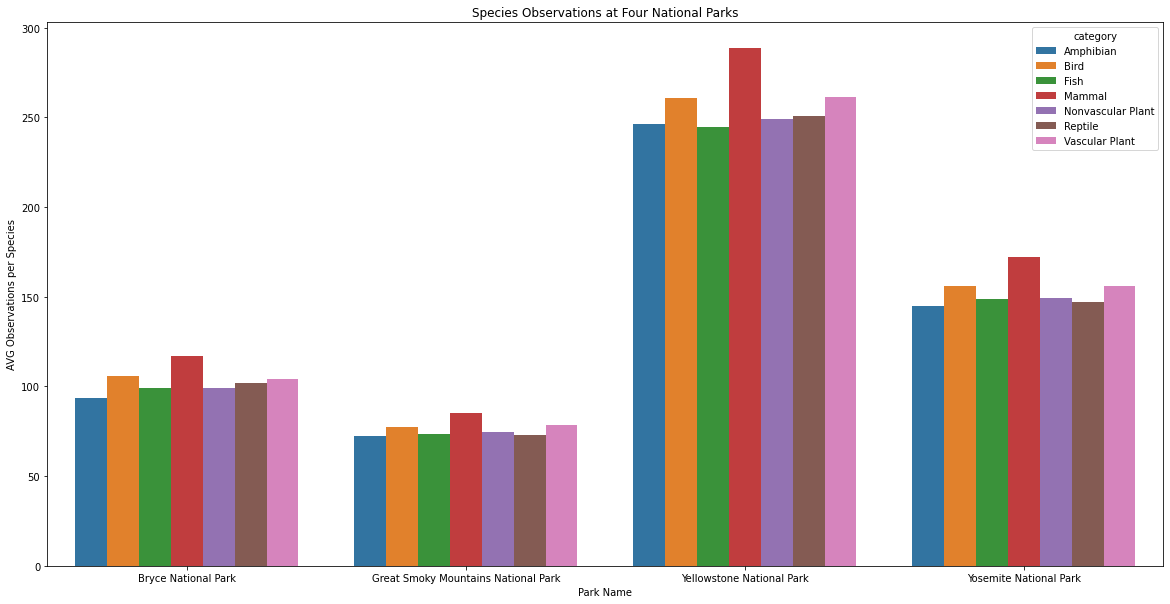

<Figure size 432x288 with 0 Axes>

In [72]:
#Create bar plot comparing average observations per species across all parks
plt.figure(figsize = (20,10))
sns.barplot(x = 'park_name', y = 'obs_per_species', hue = 'category', data = parks_by_species_df)
plt.xlabel('Park Name')
plt.ylabel('AVG Observations per Species')
plt.title('Species Observations at Four National Parks')
plt.savefig('obs_per_species.png')
plt.show()
plt.clf()

Based on this chart, it looks like although Yellowstone had far more observations of all species, the percentage of each category of species observed compared to the total was about equal for all parks. I want to calculate the percentage to confirm this.

While I'm doing this, I will also add a column for total acreage of each park so I can calculate species density.

In [73]:
#Create list of total observations per park
total_observations = species_observations_df.groupby('park_name').observations.sum().reset_index()
total_observations_list = total_observations.observations.values.tolist()
total_observations_list

[576025, 431820, 1443562, 863332]

In [74]:
#Add list data to park size dataframe
park_size_df['total_observations'] = total_observations_list
park_size_df

,park_name,park_size,total_observations
0,Bryce National Park,35835.08,576025
1,Great Smoky Mountains National Park,522426.88,431820
2,Yellowstone National Park,2219790.71,1443562
3,Yosemite National Park,761747.50,863332


In [75]:
#Create a new dataframe combining park size and parks by species
species_density_df = pd.merge(parks_by_species_df, park_size_df)
#Normalize the observations
species_density_df['normalized_obs'] = \
species_density_df.observations/species_density_df.total_observations/species_density_df.scientific_name*100
#Calculate species density per acre
species_density_df['species_density'] = species_density_df.observations/species_density_df.park_size
species_density_df.head()

,park_name,category,scientific_name,observations,obs_per_species,park_size,total_observations,normalized_obs,species_density
0,Bryce National Park,Amphibian,79,7380,93.417722,35835.08,576025,0.016218,0.205943
1,Bryce National Park,Bird,488,51647,105.834016,35835.08,576025,0.018373,1.441241
2,Bryce National Park,Fish,125,12423,99.384000,35835.08,576025,0.017253,0.346671
3,Bryce National Park,Mammal,176,20550,116.761364,35835.08,576025,0.020270,0.573460
4,Bryce National Park,Nonvascular Plant,333,32992,99.075075,35835.08,576025,0.017200,0.920662


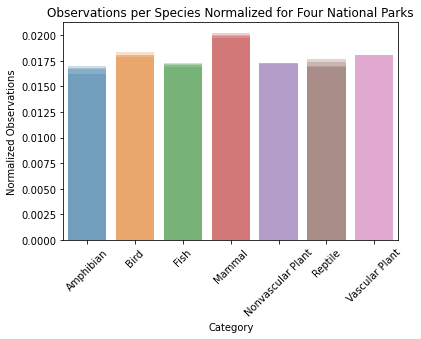

<Figure size 432x288 with 0 Axes>

In [76]:
#Create an overlapping bar chart to compare proportion of all species types observed for each park
sns.barplot(x = 'category', y = 'normalized_obs', data = species_density_df.loc[species_density_df.park_name == 'Bryce National Park'], alpha = 0.25)
sns.barplot(x = 'category', y = 'normalized_obs', data = species_density_df.loc[species_density_df.park_name == 'Great Smoky Mountains National Park'], alpha = 0.25)
sns.barplot(x = 'category', y = 'normalized_obs', data = species_density_df.loc[species_density_df.park_name == 'Yellowstone National Park'], alpha = 0.25)
sns.barplot(x = 'category', y = 'normalized_obs', data = species_density_df.loc[species_density_df.park_name == 'Yosemite National Park'], alpha = 0.25)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Normalized Observations')
plt.title('Observations per Species Normalized for Four National Parks')
plt.show()
plt.clf()

With this chart, I can see that the proportion of observations per species for all species categories was approximately the same for all four parks.

Now I want to look at the density per acre for each species category.

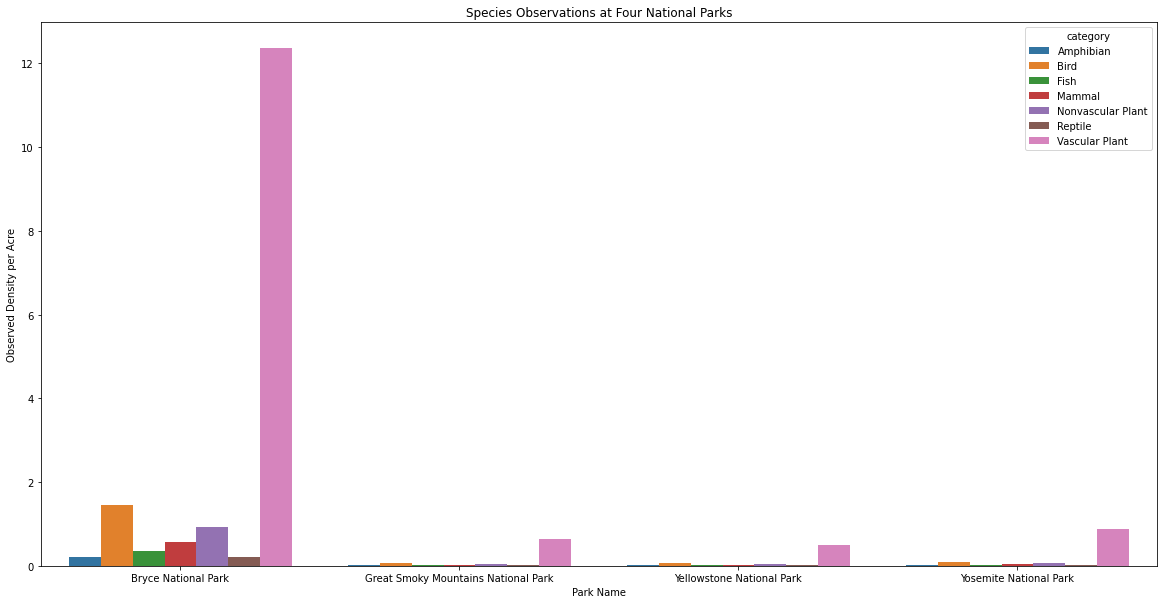

<Figure size 432x288 with 0 Axes>

In [77]:
#Create a bar chart showing density per acre per category
plt.figure(figsize = (20,10))
sns.barplot(x = 'park_name', y = 'species_density', hue = 'category', data = species_density_df)
plt.xlabel('Park Name')
plt.ylabel('Observed Density per Acre')
plt.title('Species Observations at Four National Parks')
plt.show()
plt.clf()

Bryce National Park looks to be much more dense in terms of different species per acre, especially when it comes to vascular plants. This makes sense, because it is the smallest park by far. From what I can see of the other parks, it appears that vascular plants are also the leaders in density for them, just not to the same extent as Bryce.

The vascular plant data is making it hard to analyze the rest of the information, so I'm going to filter it out for now.

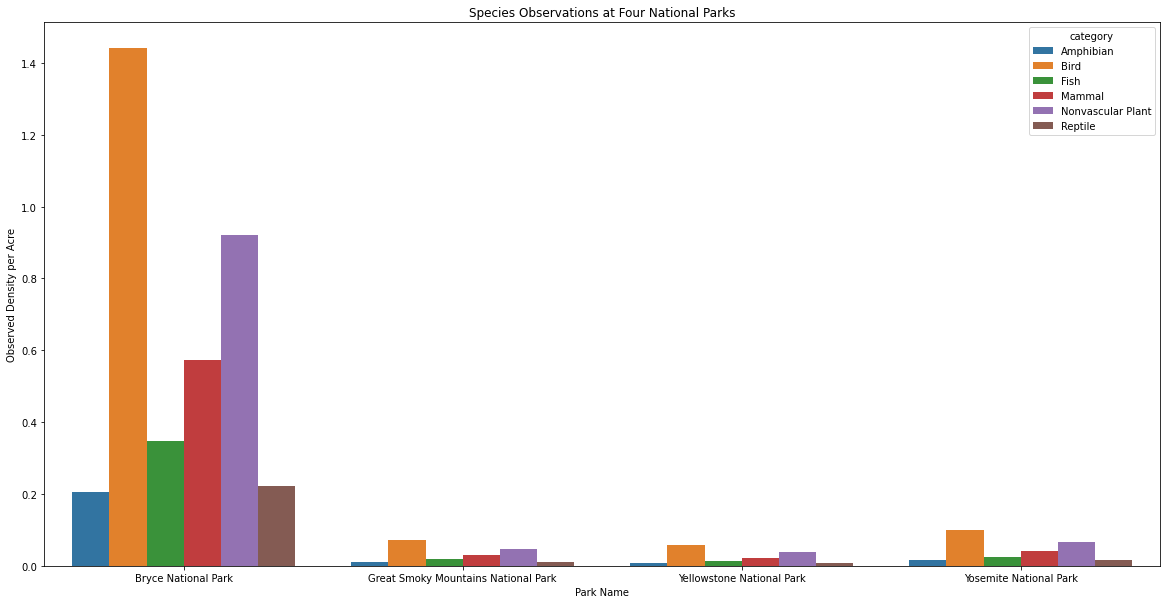

<Figure size 432x288 with 0 Axes>

In [78]:
#Create the same bar chart, removing vascular plant data
plt.figure(figsize = (20,10))
sns.barplot(x = 'park_name', y = 'species_density', hue = 'category', data = species_density_df.loc[species_density_df.category != 'Vascular Plant'])
plt.xlabel('Park Name')
plt.ylabel('Observed Density per Acre')
plt.title('Species Observations at Four National Parks')
plt.show()
plt.savefig('species_density.png')
plt.clf()

Bryce is still the most dense by far, but I can see that the other parks do appear to have the same proportions of density spread across the species categories. 

The final thing to do for this question is get a list of the top five observed species per park, and the number of observations in each case.

In [79]:
#Create four new dataframes breaking out species observations by park
bryce_df = species_observations_df.loc[species_observations_df.park_name == 'Bryce National Park']
gsm_df = species_observations_df.loc[species_observations_df.park_name == 'Great Smoky Mountains National Park']
yellowstone_df = species_observations_df.loc[species_observations_df.park_name == 'Yellowstone National Park']
yosemite_df = species_observations_df.loc[species_observations_df.park_name == 'Yosemite National Park']

In [80]:
#Break out the top 5 observed species for each park
bryce_df_5 = bryce_df.sort_values(by = 'observations', ascending=False).iloc[0:5]
gsm_df_5 = gsm_df.sort_values(by = 'observations', ascending=False).iloc[0:5]
yellowstone_df_5 = yellowstone_df.sort_values(by = 'observations', ascending=False).iloc[0:5]
yosemite_df_5 = yosemite_df.sort_values(by = 'observations', ascending=False).iloc[0:5]
#Combine the top 5 dataframes into one and print it
top_5_df = pd.concat([bryce_df_5, gsm_df_5, yellowstone_df_5, yosemite_df_5]).reset_index(drop=True).sort_values(by = 'scientific_name')
top_5_df

,scientific_name,park_name,observations,category,common_names,conservation_status
18,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219,Vascular Plant,"Gray Low Sagebrush, Little Sagebrush",Not Threatened
14,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,"Stick-Tight, Three-Lobe Beggar-Ticks",Not Threatened
7,Botrychium dissectum,Great Smoky Mountains National Park,144,Vascular Plant,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern",Not Threatened
9,Branta hutchinsii,Great Smoky Mountains National Park,139,Bird,Cackling Goose,Not Threatened
11,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,"Giant Red Indian Paintbrush, Great Red Indian ...",Not Threatened
19,Castilleja pallescens,Yosemite National Park,214,Vascular Plant,"Pale Indian Paintbrush, Pale Paintbrush",Not Threatened
12,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",Not Threatened
3,Draba oligosperma,Bryce National Park,167,Vascular Plant,"Fewseed Draba, Glacier Draba",Not Threatened
13,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,American Dragonhead,Not Threatened
2,Ericameria bloomeri,Bryce National Park,172,Vascular Plant,"Bloomer's Goldenbush, Rabbitbush",Not Threatened


Almost every species in the top 5 list for each park was a vascular plant. The only other categories are bird, represented by the cackling goose in Great Smoky Mountains, and mammal, represented by the pine marten in Bryce National Park. 

This seems a bit strange, because the top observations per species across all four parks was mammal. Why are there not more mammals? Perhaps there are some duplicates in the observations_df that are hiding the true counts of the species.

I will redo the analysis after grouping by scientific name.

In [81]:
#Group the four park dataframes by scientific name
bryce_df_grouped = bryce_df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 'conservation_status']).observations.sum().reset_index()
gsm_df_grouped = gsm_df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 'conservation_status']).observations.sum().reset_index()
yellowstone_df_grouped = yellowstone_df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 'conservation_status']).observations.sum().reset_index()
yosemite_df_grouped = yosemite_df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 'conservation_status']).observations.sum().reset_index()

In [82]:
#Repeat the same code to pull the top 5 species from the new grouped data
bryce_df_5 = bryce_df_grouped.sort_values(by = 'observations', ascending=False).iloc[0:5]
gsm_df_5 = gsm_df_grouped.sort_values(by = 'observations', ascending=False).iloc[0:5]
yellowstone_df_5 = yellowstone_df_grouped.sort_values(by = 'observations', ascending=False).iloc[0:5]
yosemite_df_5 = yosemite_df_grouped.sort_values(by = 'observations', ascending=False).iloc[0:5]
top_5_df = pd.concat([bryce_df_5, gsm_df_5, yellowstone_df_5, yosemite_df_5]).reset_index(drop=True).sort_values(by = 'scientific_name')
top_5_df

,scientific_name,park_name,category,common_names,conservation_status,observations
2,Avena sativa,Bryce National Park,Vascular Plant,"Cultivated Oat, Oats",Not Threatened,303
16,Castor canadensis,Yosemite National Park,Mammal,"American Beaver, Beaver",Not Threatened,501
7,Castor canadensis,Great Smoky Mountains National Park,Mammal,"American Beaver, Beaver",Not Threatened,243
0,Columba livia,Bryce National Park,Bird,Rock Dove,Not Threatened,339
9,Fragaria virginiana,Great Smoky Mountains National Park,Vascular Plant,"Virginia Strawberry, Wild Strawberry",Not Threatened,217
10,Holcus lanatus,Yellowstone National Park,Vascular Plant,"Common Velvet Grass, Velvetgrass",Not Threatened,805
17,Holcus lanatus,Yosemite National Park,Vascular Plant,"Common Velvet Grass, Velvetgrass",Not Threatened,463
14,Hypochaeris radicata,Yellowstone National Park,Vascular Plant,"Cat's Ear, Spotted Cat's-Ear",Not Threatened,726
15,Hypochaeris radicata,Yosemite National Park,Vascular Plant,"Cat's Ear, Spotted Cat's-Ear",Not Threatened,505
4,Myotis lucifugus,Bryce National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,298


Now I'm seeing much higher values and duplicate species across each park. 

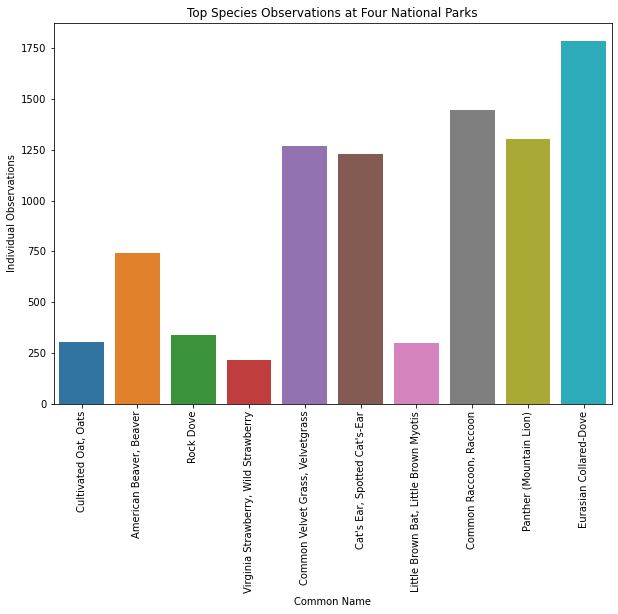

<Figure size 432x288 with 0 Axes>

In [83]:
#Create a bar chart showing the number of observations for the top species observed at all parks
graphing_df = top_5_df.groupby(['scientific_name', 'common_names']).observations.sum().reset_index()
plt.figure(figsize = (10,7))
sns.barplot(x = 'common_names', y = 'observations', data = graphing_df)
plt.xticks(rotation=90)
plt.xlabel('Common Name')
plt.ylabel('Individual Observations')
plt.title('Top Species Observations at Four National Parks')
plt.show()
plt.clf()

## Is there a relationship between endangered species and observation level at the parks?

What I want to know here is, are endangered species less likely to be observed than non-endangered species? It seems likely - if they are endangered, there are fewer of them - but it's possible that because of the protected status of national parks, there are actually just as many observations of endangered species per species as non-endangered species, and the lower numbers of endangered species are from observations outside of national parks. 

To get started, I want to know the observations per species in each category for endangered vs non-endangered species.

In [84]:
#Add a column for whether or not the species is endangered
species_observations_df['is_endangered'] = \
species_observations_df.conservation_status.apply(lambda x: False if x == 'Not Threatened' else True)
species_observations_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_endangered
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Threatened,False


In [85]:
#Create a new dataframe that calculates endangered and not endangered species in each category
endangered_category_df = species_observations_df.groupby(['category', 'is_endangered']).agg({'scientific_name': lambda x: x.nunique(), 'observations': np.sum}).reset_index()
endangered_category_df.rename(columns={'scientific_name': 'species_count'}, inplace=True)
endangered_category_df.head()

,category,is_endangered,species_count,observations
0,Amphibian,False,72,41219
1,Amphibian,True,7,2752
2,Bird,False,413,254225
3,Bird,True,75,38608
4,Fish,False,115,67422


In [86]:
#Calculate observations per species for each category
endangered_category_df['obs_per_species'] = endangered_category_df.observations/endangered_category_df.species_count
endangered_category_df

,category,is_endangered,species_count,observations,obs_per_species
0,Amphibian,False,72,41219,572.486111
1,Amphibian,True,7,2752,393.142857
2,Bird,False,413,254225,615.556901
3,Bird,True,75,38608,514.773333
4,Fish,False,115,67422,586.278261
5,Fish,True,10,3396,339.600000
6,Mammal,False,146,100247,686.623288
7,Mammal,True,30,16449,548.300000
8,Nonvascular Plant,False,328,187948,573.012195
9,Nonvascular Plant,True,5,2705,541.000000


From first glance, it looks like there are fewer observations per species for endangered species vs non-endangered species. Next, I want to put these values in a chart for better analysis and find out if the differences in observations per species are statistically significant.

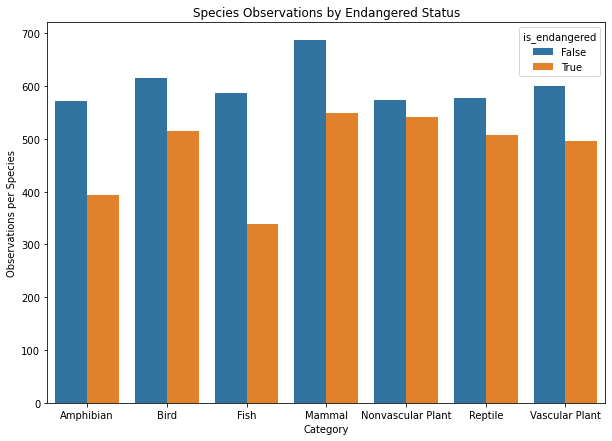

<Figure size 432x288 with 0 Axes>

In [87]:
#Create a bar plot showing observations per category, per endangered status
plt.figure(figsize = (10,7))
sns.barplot(x = 'category', y = 'obs_per_species', hue = 'is_endangered', data = endangered_category_df)
plt.xlabel('Category')
plt.ylabel('Observations per Species')
plt.title('Species Observations by Endangered Status')
plt.savefig('observation_by_status.png')
plt.show()
plt.clf()

For all the categories, there were fewer observations per species for species with endangered status, but the difference in level of observations between endangered and non-endangered species varies across categories. What I want to figure out next is if the difference in observations per species is statistically significant for each category.

I'm going to run one-sample t-tests, where the null hypothesis is that the mean(average observations per species) for endangered species is the same as the mean(average observations per species) for non-endangered species. The expected mean in each case will be the obs_per_species for the non-endangered species, and the sample data will be the observations for the endangered species. 

I won't be able to run this test for nonvascular plants, reptiles, and amphibians. With fewer than 10 species and 4 parks, the sample data just won't be large enough. I'll also group by scientific name before I run the tests, since multiple observations of the same species will lead to lower means. 

In [88]:
#Create a new dataframe for the t-tests
stats_test_df = species_observations_df.loc[species_observations_df.is_endangered == True].groupby(['scientific_name', 'category']).observations.sum().reset_index()
stats_test_df.head()

,scientific_name,category,observations
0,Abies fraseri,Vascular Plant,518
1,Abronia ammophila,Vascular Plant,523
2,Accipiter cooperii,Bird,543
3,Accipiter striatus,Bird,446
4,Achnatherum contractum,Vascular Plant,549


In [89]:
#Run the t-test for the Bird category
from scipy.stats import ttest_1samp
bird_tstat, bird_pval = ttest_1samp(stats_test_df.loc[stats_test_df.category == 'Bird'].observations, 701.324455)
print(f'{bird_pval/2:.20%}')

0.00000000000000721509%


That's a pretty low p-value, so we can say that for birds the null hypothesis is NOT true and the observed number of each endangered species will be lower than the observed number of each non-endangered species.

Now I will run the same test for fish, mammals, and vascular plants

In [90]:
#Run the t-test for the Fish category
fish_tstat, fish_pval = ttest_1samp(stats_test_df.loc[stats_test_df.category == 'Fish'].observations, 597.321739)
print(f'{fish_pval/2:.5%}')

0.05068%


In [91]:
#Run the t-test for the Mammal category
mammal_tstat, mammal_pval = ttest_1samp(stats_test_df.loc[stats_test_df.category == 'Mammal'].observations, 945.027397)
print(f'{mammal_pval/2:.5%}')

0.00001%


In [92]:
#Run the t-test for the Vascular Plant category
vplant_tstat, vplant_pval = ttest_1samp(stats_test_df.loc[stats_test_df.category == 'Vascular Plant'].observations, 657.605076)
print(f'{vplant_pval/2:.20%}')

0.00000000000000030377%


All the other categories except for fish had statistically significant p-values as well (assuming statistical significance of 0.05). Looking back at the data, this may be because fish had the lowest sample size of all the categories I tested. With 11 different endangered species and 4 parks, it came out to a sample size of 44, which is barely large enough to qualify for a one-sample t-test.

Just to confirm, I want to run the same test for all species together.

In [94]:
#Create a new dataframe combining all categories
observations_sum = endangered_category_df.groupby(['is_endangered']).agg({'species_count': np.sum, 'observations': np.sum}).reset_index()
observations_sum['obs_per_species'] = observations_sum.observations/observations_sum.species_count
observations_sum

,is_endangered,species_count,observations,obs_per_species
0,False,5363,3225444,601.425322
1,True,178,89295,501.657303


In [95]:
#Run the t-test for all categories
a_tstat, a_pval = ttest_1samp(stats_test_df.observations, 660.512027)
print(f'{a_pval/2:.30%}')

0.000000000000000000000459710509%


That's the lowest p-value we've had so far. Based on the above analysis, I can conclude that observations per species will be smaller for endangered species than non-endangered species.

## Which genus (type of species) seems to be most in need of protection?

Finally, I want to figure out which genus from this data appears most on the endangered species list.

I'll start by getting a list of the unique genus for each species. It's pretty easy to do this from the scientific name, since they all start with genus.

In [96]:
#Create a new dataframe with just endangered species
endangered_species_df = species_info_no_duplicates.loc[species_info_no_duplicates.conservation_status != 'Not Threatened']
endangered_species_df.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [97]:
#Split the scientific name into two columns, species and genus
endangered_species_df['split'] = endangered_species_df.scientific_name.str.split(' ')
endangered_species_df['genus'] = endangered_species_df.split.str.get(0)
endangered_species_df.head()

<ipython-input-97-7cff21f41e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endangered_species_df['split'] = endangered_species_df.scientific_name.str.split(' ')
<ipython-input-97-7cff21f41e13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endangered_species_df['genus'] = endangered_species_df.split.str.get(0)


,category,scientific_name,common_names,conservation_status,split,genus
7,Mammal,Canis latrans,Coyote,Species of Concern,"[Canis, latrans]",Canis
8,Mammal,Canis lupus,Gray Wolf,Endangered,"[Canis, lupus]",Canis
9,Mammal,Canis rufus,Red Wolf,Endangered,"[Canis, rufus]",Canis
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,"[Eptesicus, fuscus]",Eptesicus
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,"[Lasionycteris, noctivagans]",Lasionycteris


In [98]:
#Drop unnecessary columns
endangered_species_df = endangered_species_df.drop(endangered_species_df.columns[4], axis = 1).reset_index()
endangered_species_df.head()

,index,category,scientific_name,common_names,conservation_status,genus
0,7,Mammal,Canis latrans,Coyote,Species of Concern,Canis
1,8,Mammal,Canis lupus,Gray Wolf,Endangered,Canis
2,9,Mammal,Canis rufus,Red Wolf,Endangered,Canis
3,29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,Eptesicus
4,30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,Lasionycteris


In [100]:
#Create a new dataframe with just genus and count of species
endangered_genus_df = endangered_species_df.groupby('genus').scientific_name.count().reset_index()
endangered_genus_df.sort_values(by = 'scientific_name', ascending=False).head()

,genus,scientific_name
91,Myotis,12
58,Falco,4
26,Canis,3
118,Rana,3
103,Percina,2


The genus with the most endangered species on this list is Myotis with 12, followed by Falco with 4 and Canis and Rana with 3 each. I will find out more about these species.

In [101]:
#Filter the endangered species dataframe to pull only the top genus
top_endangered_genus = endangered_species_df.loc[endangered_species_df.genus.isin(['Myotis', 'Falco', 'Canis', 'Rana'])]
top_endangered_genus

,index,category,scientific_name,common_names,conservation_status,genus
0,7,Mammal,Canis latrans,Coyote,Species of Concern,Canis
1,8,Mammal,Canis lupus,Gray Wolf,Endangered,Canis
2,9,Mammal,Canis rufus,Red Wolf,Endangered,Canis
5,33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern,Myotis
6,34,Mammal,Myotis grisescens,Gray Myotis,Endangered,Myotis
7,35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern,Myotis
8,36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,Myotis
9,37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,Myotis
10,38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,Myotis
11,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Myotis


The Myotis genus is for bats, which makes sense because bats make up a large percentage of all mammal species. Falco appears to be for falcons, Canis for coyotes and wolves, and Rana for frogs.

## Conclusions

In this project, I answered four questions posed in the introduction:

- Which park is home to the most endangered species?
    - Yellowstone is home to the most endangered species, with about 38 thousand observations in the week I had data for. This is likely due to its large size compared to the other parks.

- Which park has the most biodiversity, in plants and animals? 
    - All parks had observational data for all the animals on the list, both endangered and not endangered. Bryce National Park had the greatest density of species per acre, and vascular plants had the greatest number of species observed per acre for all four parks.
    
- Is there a relationship between endangered species and observation level at the parks?
    - There is a statistically significant difference in observations per species between endangered and non endangered species. Endangered species are less likely to be observed than non endangered species.
    
- Which genus (type of species) seems to be most in need of protection?
    - The Myotis genus (bats) is most in need of protection, with 12 entries on the endangered species list. The next most endangered were Falco (falcons), Canis (wolves and coyotes), and Rana (frogs).
    
## Futher Research

Since I only had data for a seven day period, it would be interesting to see how the number of each species observed changes over time, particularly over the course of a year. I would expect ectothermic creatures like amphibians and reptiles to be less present during the winter months. 

It would also be interesting to grab observational data from around the parks, in areas that may have similar climate but without the protection from human intervention that parks provide.